# Generate positions

In [2]:
import numpy as np
import os
from __future__ import print_function, division, absolute_import,unicode_literals
import matplotlib.pylab as plt
%matplotlib inline

In [3]:
0.108 * 2048

221.184

In [15]:
#center = [-819.40,-739.05] # center you picked
#new center
center = [-5460.85, 211.35] 
dim_x, dim_y = 3, 3 # x, y dimension of square we want to image
size = int(2048 * 0.108 * 0.95) # each field of view is 2048*0.108 um in x and y
print('size:', size)
frame_dimension = size; # need based selection

print(center, dim_x, dim_y)

# indices of positions
pos_indices = np.indices([dim_x,dim_y]) - np.array([float(dim_x-1)/2,float(dim_y-1)/2])[:,np.newaxis,np.newaxis]
# calculate positions
positions = pos_indices * np.array([frame_dimension,frame_dimension])[:,np.newaxis,np.newaxis] + np.array(center)[:,np.newaxis,np.newaxis]
# sort position
sorted_positions = np.zeros([dim_x*dim_y, 2])
for i in range(dim_x):
    if not i%2:
        sorted_positions[i*dim_y:(i+1)*dim_y,:] = positions[:,i].transpose()
    else:
        sorted_positions[i*dim_y:(i+1)*dim_y,:] = np.fliplr(positions[:,i]).transpose()
sorted_positions = np.round(sorted_positions, 1)

size: 210
[-5460.85, 211.35] 3 3


In [16]:
# write into a file
data_folder = r'D:\Shiwei\20210706-P_Forebrain_CTP09_only'
fl = os.path.join(data_folder, 'positions_5_thalamus.txt')

f = open(fl,'w')
for position in sorted_positions:
    f.write(str(position[0])+", "+str(position[1])+"\n")
f.close()

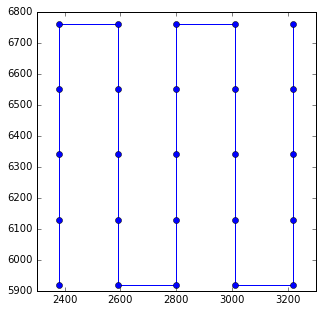

In [75]:
plt.figure(figsize=(dim_x, dim_y))
plt.plot(sorted_positions[:,0],sorted_positions[:,1],'o-')
plt.show()

In [39]:
for position in sorted_positions:
    print(str(position[0])+", "+str(position[1]))

-4015.0, 475.0
-4015.0, 685.0
-4015.0, 895.0
-4015.0, 1105.0
-4015.0, 1315.0
-4015.0, 1525.0
-3805.0, 1525.0
-3805.0, 1315.0
-3805.0, 1105.0
-3805.0, 895.0
-3805.0, 685.0
-3805.0, 475.0
-3595.0, 475.0
-3595.0, 685.0
-3595.0, 895.0
-3595.0, 1105.0
-3595.0, 1315.0
-3595.0, 1525.0
-3385.0, 1525.0
-3385.0, 1315.0
-3385.0, 1105.0
-3385.0, 895.0
-3385.0, 685.0
-3385.0, 475.0


In [15]:
pos_files = [os.path.join(data_folder, _fl) for _fl in os.listdir(data_folder) if _fl.split(os.extsep)[-1]=='txt']
print(pos_files)

[u'D:\\Shiwei\\20210529-P_Forebrain_MERFISH_CTP09_exp2\\MERFISH4\\positions_1_cortex.txt', u'D:\\Shiwei\\20210529-P_Forebrain_MERFISH_CTP09_exp2\\MERFISH4\\positions_2_hippocampus.txt', u'D:\\Shiwei\\20210529-P_Forebrain_MERFISH_CTP09_exp2\\MERFISH4\\positions_3_thalamus.txt']


In [35]:
import pandas

all_positions = []
for _fl in pos_files:
    _data_frame = pandas.read_csv(_fl,header=None, names=['X','Y'])
    for _x, _y in zip(_data_frame['X'], _data_frame['Y']):
        all_positions.append([_x,_y])
all_positions = np.round(np.array(all_positions), 2)
print(all_positions)

[[-3749.3 -1790.1]
 [-3749.3 -1580.1]
 [-3749.3 -1370.1]
 [-3749.3 -1160.1]
 [-3749.3  -950.1]
 [-3749.3  -740.1]
 [-3749.3  -530.1]
 [-3749.3  -320.1]
 [-3749.3  -110.1]
 [-3539.3  -110.1]
 [-3539.3  -320.1]
 [-3539.3  -530.1]
 [-3539.3  -740.1]
 [-3539.3  -950.1]
 [-3539.3 -1160.1]
 [-3539.3 -1370.1]
 [-3539.3 -1580.1]
 [-3539.3 -1790.1]
 [-3329.3 -1790.1]
 [-3329.3 -1580.1]
 [-3329.3 -1370.1]
 [-3329.3 -1160.1]
 [-3329.3  -950.1]
 [-3329.3  -740.1]
 [-3329.3  -530.1]
 [-3329.3  -320.1]
 [-3329.3  -110.1]
 [-3119.3  -110.1]
 [-3119.3  -320.1]
 [-3119.3  -530.1]
 [-3119.3  -740.1]
 [-3119.3  -950.1]
 [-3119.3 -1160.1]
 [-3119.3 -1370.1]
 [-3119.3 -1580.1]
 [-3119.3 -1790.1]
 [-1971.  -1937. ]
 [-1971.  -1727. ]
 [-1971.  -1517. ]
 [-1971.  -1307. ]
 [-1971.  -1097. ]
 [-1971.   -887. ]
 [-1971.   -677. ]
 [-1971.   -467. ]
 [-1761.   -467. ]
 [-1761.   -677. ]
 [-1761.   -887. ]
 [-1761.  -1097. ]
 [-1761.  -1307. ]
 [-1761.  -1517. ]
 [-1761.  -1727. ]
 [-1761.  -1937. ]
 [ -999.9 -1

In [42]:
data_folder = r'D:\Shiwei\20210529-P_Forebrain_MERFISH_CTP09_exp2'

all_positions = np.loadtxt(os.path.join(data_folder, 'adjusted_translated_positions_all.txt'), delimiter=',')

In [43]:
all_positions

array([[-3746.7, -1786.2],
       [-3746.7, -1576.2],
       [-3746.7, -1366.2],
       [-3746.7, -1156.2],
       [-3746.7,  -946.2],
       [-3746.7,  -736.2],
       [-3746.7,  -526.2],
       [-3746.7,  -316.2],
       [-3746.7,  -106.2],
       [-3536.7,  -106.2],
       [-3536.7,  -316.2],
       [-3536.7,  -526.2],
       [-3536.7,  -736.2],
       [-3536.7,  -946.2],
       [-3536.7, -1156.2],
       [-3536.7, -1366.2],
       [-3536.7, -1576.2],
       [-3536.7, -1786.2],
       [-3326.7, -1786.2],
       [-3326.7, -1576.2],
       [-3326.7, -1366.2],
       [-3326.7, -1156.2],
       [-3326.7,  -946.2],
       [-3326.7,  -736.2],
       [-3326.7,  -526.2],
       [-3326.7,  -316.2],
       [-3326.7,  -106.2],
       [-3116.7,  -106.2],
       [-3116.7,  -316.2],
       [-3116.7,  -526.2],
       [-3116.7,  -736.2],
       [-3116.7,  -946.2],
       [-3116.7, -1156.2],
       [-3116.7, -1366.2],
       [-3116.7, -1576.2],
       [-3116.7, -1786.2],
       [-1968.4, -1933.1],
 

In [44]:
# write into a file

all_pos_filename = os.path.join(data_folder, 'adjusted_positions_all.txt')

with open(all_pos_filename, 'w') as _fp:
    for position in all_positions:
        #_fp.write(str(round(position[0],2))+","+str(position[1])+os.linesep) # python2 works
        _fp.write(str(round(position[0],2))+","+str(position[1])+"\n")

In [38]:
x= " 999"

In [39]:
float (x)

999.0